# AFL 2 - Jesslyn Gabrielle H - 0706022110025
--------------------------------------

Import library yang dibutuhkan



In [413]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [414]:
url = 'customer_analysis.csv'
df = pd.read_csv(url, sep='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Cleaning and Preparation
1. Missing values
2. date_time format
3. categorical feature that needs to be encoded into numerical format

In [415]:
remove = df[['ID','Dt_Customer']]
df = df.drop(remove, axis = 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [416]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [417]:
df['Income'].fillna(0, inplace=True)
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering
1. Age Extraction: We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth."
2. Spending Power: Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.
3. Household Living Arrangement: craft "Living_With" from "Marital_Status," revealing the living arrangements of  valued couples.
4. Family Dynamics: "Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.
5. Family Unity: "Family_Size" will take shape, providing insights into the size and structure of each household.
6. Parental Status: "Is_Parent" will be born, simplifying the journey of parenthood for our customers.
7. Educational Evolution: "Education" will undergo a transformation, restructured into three distinct categories for clarity.
8. Farewell to Redundancy: We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.

In [418]:
# Age Extraction
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Spending Power
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({'Married': 'With Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone','Absurd': 'Alone','Together': 'With Partner'})

# Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# Family Unity
df['Family_Size'] = df['Children'] + df['NumDealsPurchases']  # Assuming adults in 'NumDealsPurchases'

# Parental Status
df['Is_Parent'] = (df['Children'] > 0).astype(int)

# Educational Evolution
df['Education_Level'] = df['Education'].map({'PhD': 'Postgraduate', 'Master': 'Postgraduate', 'Graduation': 'Undergraduate'})

# # Farewell to Redundancy (drop the 'Year_Birth' column, and other columns as needed)
df.drop(columns=['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Marital_Status', 'Kidhome', 'Teenhome','Children', 'NumDealsPurchases', 'Education' ], inplace=True)



## Data Preparation
1. Label Encoding: Translate categorical features into numbers so that your algorithms can work their magic.
2. Scaling: Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.
3. Dimensionality Reduction: Creating a smaller, more manageable subset of data, simplifying the complexity for smoother analysis. (may or may not be used)

In [419]:
label_encoder = LabelEncoder()
df['Living_With_encoded'] = label_encoder.fit_transform(df['Living_With'])
df['Education_Level_encoded'] = label_encoder.fit_transform(df['Education_Level'])

In [420]:
scaler = StandardScaler()
df[['Age', 'Spent']] = scaler.fit_transform(df[['Age', 'Spent']])

In [421]:
n_components = 2  # Adjust this value as needed

# Create a PCA instance and fit it to your data
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df[['Age', 'Spent']])  # Apply PCA to specific features

# Add the PCA components to your DataFrame
df['PCA1'] = df_pca[:, 0]  # Name these components as 'PCA1' and 'PCA2'
df['PCA2'] = df_pca[:, 1]


## Clustering
key milestones:
1. Elbow Method: We'll pinpoint the ideal number of clusters.
2. Agglomerative Clustering: The heart of our clustering journey.
3. Scatter Plot Revelations: We'll unveil the cluster patterns using scatter plots. 

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

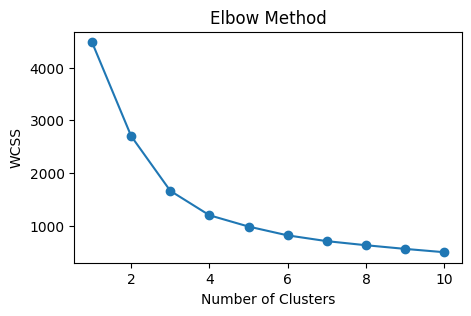

In [422]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=500, random_state=42)
    kmeans.fit(df[['Age', 'Spent']]) 
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [423]:
findknee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  4


In [424]:
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
df['Cluster'] = agg_clustering.fit_predict(df[['Age', 'Spent']])  

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualization 
1. you may use scatterplots, swarmplot, boxenplot to evaluate your clustering models
2. draw distribution of cluster chart
3. profiling between income and spending cluster

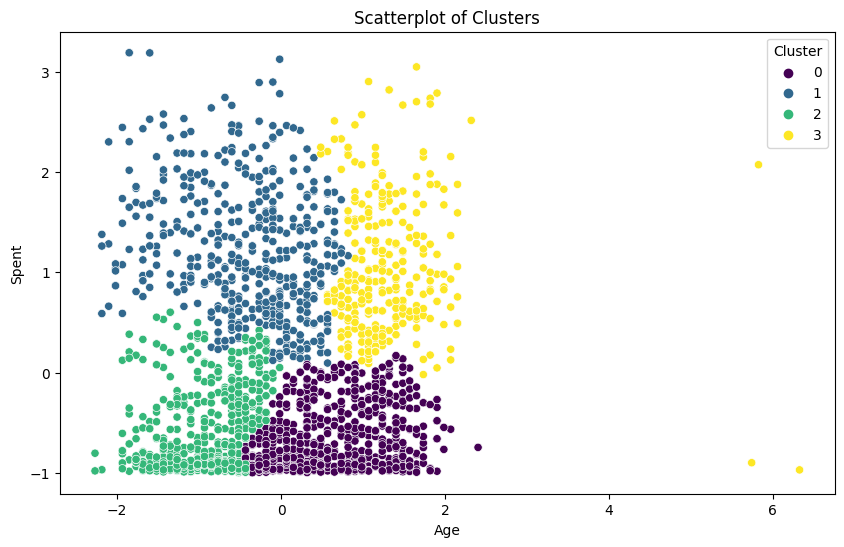

/var/folders/hd/jl4pxq1n4y95n8wpn39t72fm0000gn/T/ipykernel_71730/1695162986.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Cluster', y='Age', palette='viridis')
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jesslyngabrielle/Library/

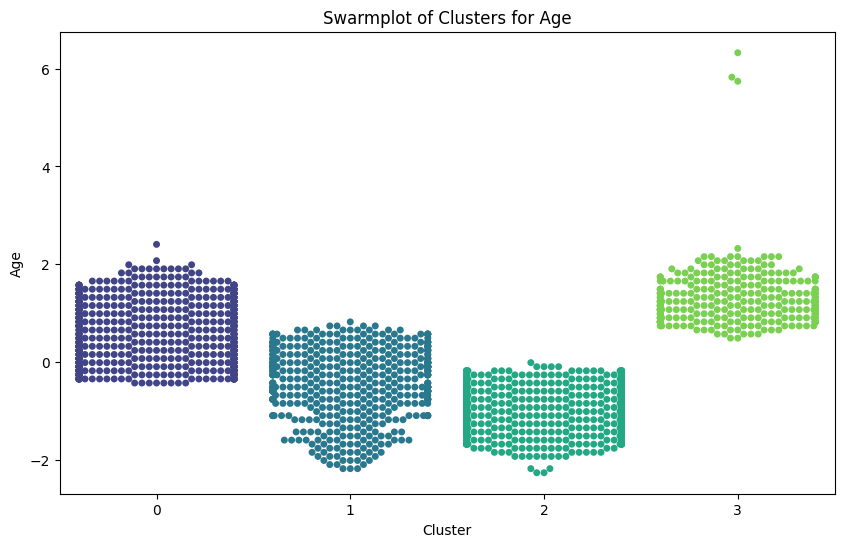

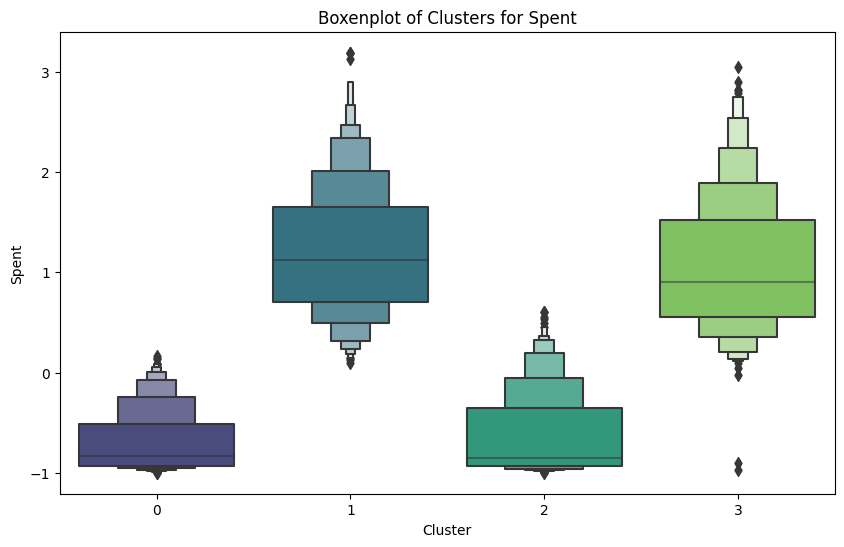

In [425]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spent', hue='Cluster', palette='viridis')
plt.title('Scatterplot of Clusters')
plt.xlabel('Age')
plt.ylabel('Spent')
plt.show()

# Swarmplot 
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Cluster', y='Age', palette='viridis')
plt.title('Swarmplot of Clusters for Age')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Boxenplot 
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Cluster', y='Spent', palette='viridis')
plt.title('Boxenplot of Clusters for Spent')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()

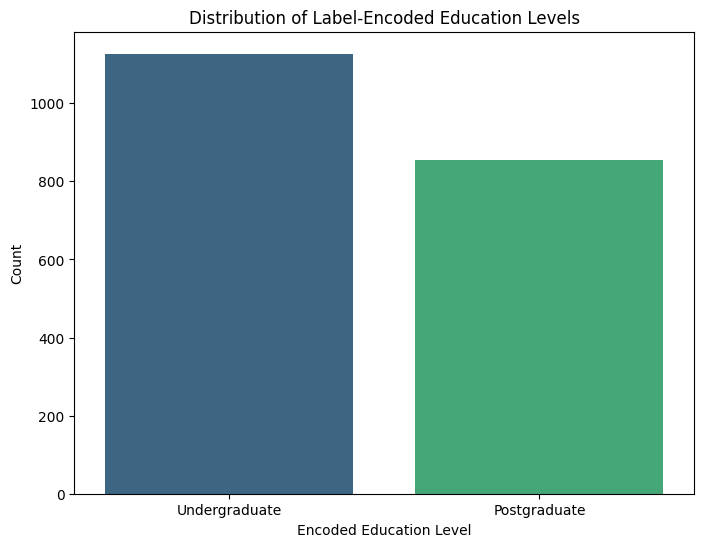

In [426]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education_Level', palette='viridis')
plt.title('Distribution of Label-Encoded Education Levels')
plt.xlabel('Encoded Education Level')
plt.ylabel('Count')
plt.show()

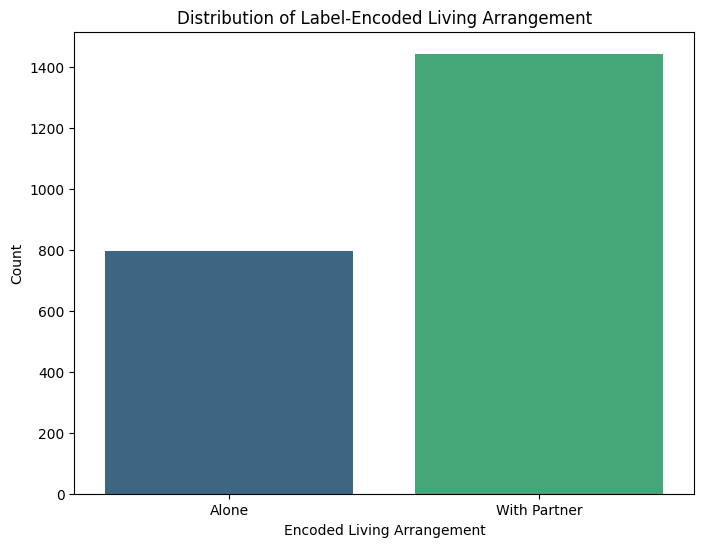

In [427]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Living_With', palette='viridis')
plt.title('Distribution of Label-Encoded Living Arrangement')
plt.xlabel('Encoded Living Arrangement')
plt.ylabel('Count')
plt.show()

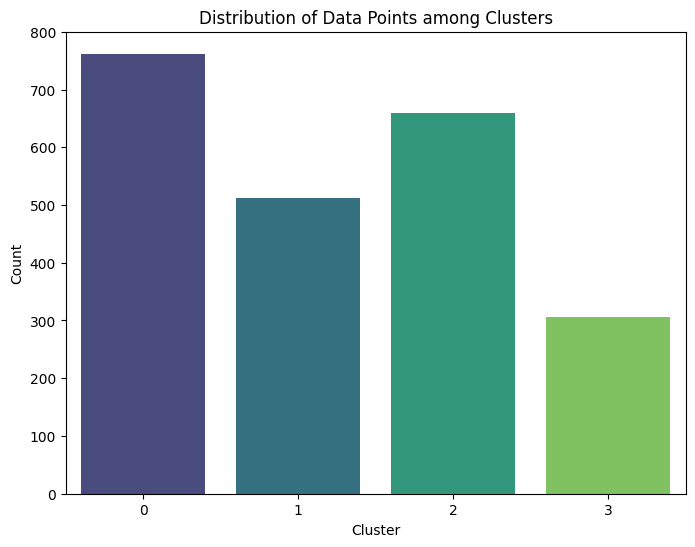

In [428]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', palette='viridis')
plt.title('Distribution of Data Points among Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


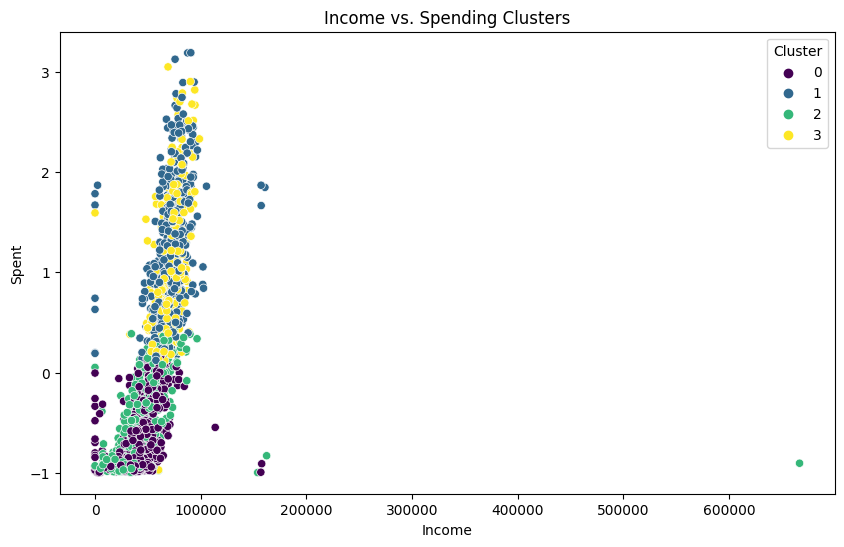

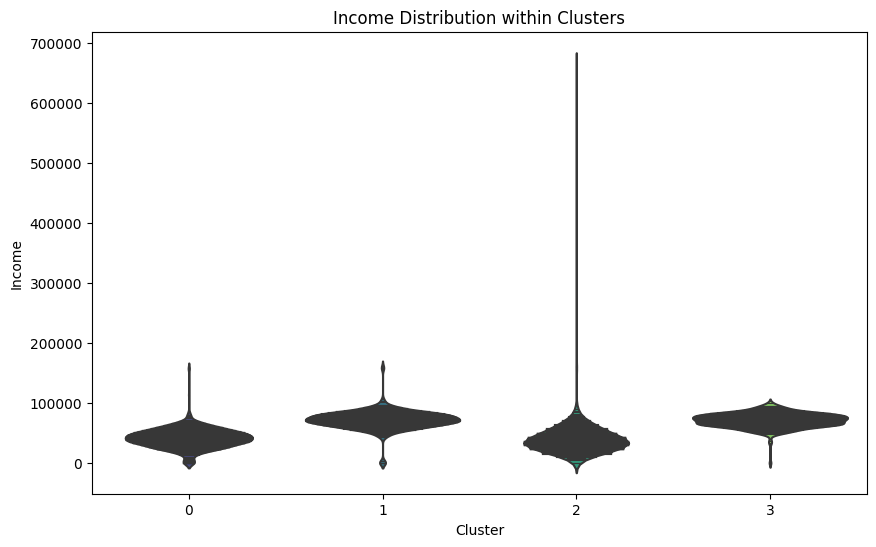

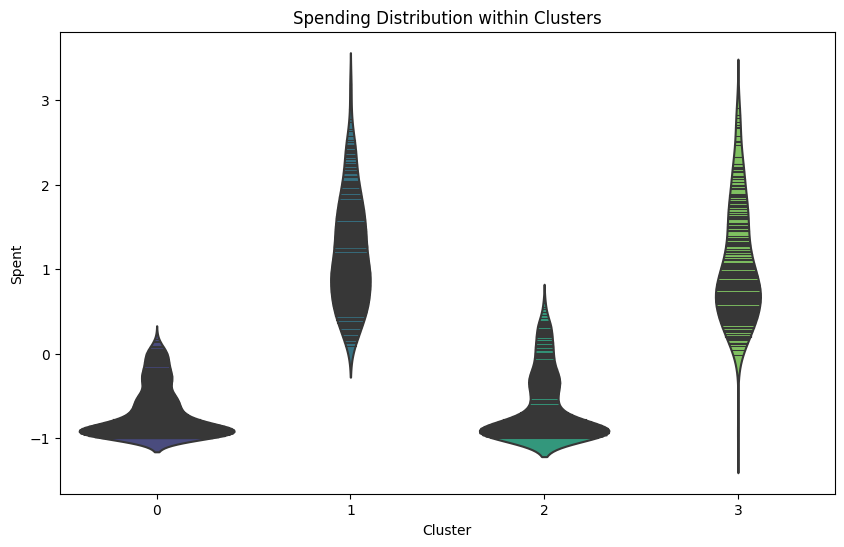

In [429]:
# Scatterplot to profile income vs. spending clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Spent', hue='Cluster', palette='viridis')
plt.title('Income vs. Spending Clusters')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

# Violinplot to visualize the distribution of income and spending within each cluster
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Income', palette='viridis', inner='stick')
plt.title('Income Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Spent', palette='viridis', inner='stick')
plt.title('Spending Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()
